In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from shapely import wkt
import json

# Cargar el CSV con geometrías
df_geometrias = pd.read_csv('Departamentos (2010).csv')
df_geometrias.columns = ["Código","Nombre","Código de provincia","Nombre de provincia","Superficie_en_km2","Latitud_del_centroide","Longitud_del_centroide","Geometría_en_GeoJSON"]
# Convertir la columna GeoJSON a geometrías Shapely
df_geometrias['geometry'] = df_geometrias['Geometría_en_GeoJSON'].apply(
    lambda x: shape(json.loads(x)) if pd.notnull(x) and isinstance(x, str) else (
        shape(x) if pd.notnull(x) and isinstance(x, dict) else None
    )
)

# Convertir a GeoDataFrame
gdf_departamentos = gpd.GeoDataFrame(
    df_geometrias, 
    geometry='geometry',
    crs="EPSG:4326"  # Sistema de coordenadas WGS84
)

# Verificar que funcionó
print(f"Total de geometrías: {len(gdf_departamentos)}")
print(f"CRS: {gdf_departamentos.crs}")
gdf_departamentos.head(2)


Total de geometrías: 525
CRS: EPSG:4326


,Código,Nombre,Código de provincia,Nombre de provincia,Superficie_en_km2,Latitud_del_centroide,Longitud_del_centroide,Geometría_en_GeoJSON,geometry
0,6007,Adolfo Alsina,6,Buenos Aires,5879.072329,-37.197150,-63.055734,"{""type"":""Polygon"",""coordinates"":[[[-63.206605,...","POLYGON ((-63.2066 -36.67023, -63.16748 -36.70..."
1,6014,Adolfo Gonzales Chaves,6,Buenos Aires,3785.063690,-37.964953,-60.248503,"{""type"":""Polygon"",""coordinates"":[[[-60.359343,...","POLYGON ((-60.35934 -37.74854, -60.32281 -37.7..."


Primeras geometrías:
  0: Polygon - POLYGON ((-63.206605 -36.670233, -63.167484 -36.70258, -63.12865 -36.734226, -63.065658 -36.785983, -63.050783 -36.79819, -63.008545 -36.832192, -63.008137 -36.832524, -63.005486 -36.834641, -62.969411 -36.86351, -62.847869 -36.962698, -62.847851 -36.962715, -62.847715 -36.962824, -62.840979 -36.968198, -62.818161 -36.986458, -62.792715 -37.006808, -62.770242 -37.02477, -62.731861 -37.055408, -62.731096 -37.056018, -62.686601 -37.091502, -62.685955 -37.09201, -62.685939 -37.091996, -62.677932 -37.098397, -62.676401 -37.09961, -62.661968 -37.111093, -62.661854 -37.111184, -62.661127 -37.111789, -62.651752 -37.119545, -62.646771 -37.123651, -62.638697 -37.122224, -62.637994 -37.122091, -62.636391 -37.12178, -62.602581 -37.09843, -62.593989 -37.096963, -62.593545 -37.101052, -62.591659 -37.10479, -62.590425 -37.10706, -62.590358 -37.107098, -62.589955 -37.107812, -62.587266 -37.109423, -62.585158 -37.112276, -62.582493 -37.115585, -62.577801 -37.118323,

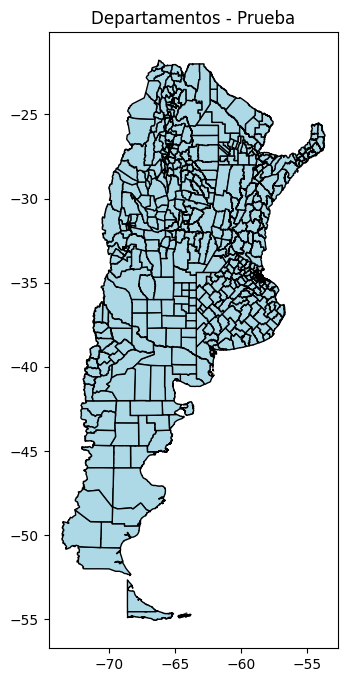

In [5]:
# Verificar las primeras geometrías
print("Primeras geometrías:")
for i, geom in enumerate(gdf_departamentos['geometry'].head(3)):
    print(f"  {i}: {geom.geom_type} - {geom}")

# Hacer un plot simple de prueba
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_departamentos.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Departamentos - Prueba')
plt.show()

In [6]:
datos_por_departamento_actividad = pd.read_csv('TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

In [9]:
# Diccionario completo de correcciones
correcciones_capital = {
    "Neuquén": "Capital (Neuquén)",
    "Córdoba": "Capital (Córdoba)", 
    "Tucumán": "Capital (Tucumán)",
    "Salta": "Capital (Salta)",
    "Corrientes": "Capital (Corrientes)",
    "Misiones": "Capital (Misiones)",
    "Santiago del Estero": "Capital (Santiago del Estero)",
    "La Rioja": "Capital (La Rioja)",
    "Catamarca": "Capital (Catamarca)",
    "Mendoza": "Capital (Mendoza)",
    "La Pampa": "Capital (La Pampa)",
    # Agregar otras provincias si es necesario
}

In [10]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv('Departamentos (2010).csv')

# Todas las provincias que necesitan corrección (basado en tu imagen)
provincias_corregir = [
    "Neuquén", "Córdoba", "Tucumán", "Salta", "Corrientes", 
    "Misiones", "Santiago del Estero", "La Rioja", "Catamarca", 
    "Mendoza", "La Pampa", "San Juan"
]

def corregir_todos_capital(row):
    nombre = row['Nombre']
    provincia = row['Nombre de provincia']
    
    # Si el departamento se llama "Capital" y NO es Buenos Aires
    if nombre == "Capital" and provincia != "Buenos Aires":
        return f"Capital ({provincia})"
    
    return nombre

# Aplicar corrección universal
df['Nombre'] = df.apply(corregir_todos_capital, axis=1)
    
# Verificar resultado
capitales_final = df[df['Nombre'].str.contains('Capital', na=False)]
print("Resultado final después de corrección universal:")
print(capitales_final[['Nombre', 'Nombre de provincia']].to_string())

# Guardar el CSV corregido
df.to_csv('departamentos_corregidos_completo.csv', index=False)

Resultado final después de corrección universal:
                            Nombre  Nombre de provincia
134             Capital (La Rioja)             La Rioja
151              Capital (Mendoza)              Mendoza
172             Capital (San Juan)             San Juan
194            Capital (Catamarca)            Catamarca
205              Capital (Córdoba)              Córdoba
232           Capital (Corrientes)           Corrientes
339             Capital (La Pampa)             La Pampa
362             Capital (Misiones)             Misiones
408                Capital (Salta)                Salta
435                     La Capital             San Luis
452                     La Capital             Santa Fe
469  Capital (Santiago del Estero)  Santiago del Estero
501              Capital (Tucumán)              Tucumán


In [11]:
# Verificar que no queden departamentos llamados solo "Capital" (excepto Buenos Aires)
capitales_problematicas = df[
    (df['Nombre'] == 'Capital') & 
    (df['Nombre de provincia'] != 'Buenos Aires')
]

if len(capitales_problematicas) == 0:
    print("✅ Todos los departamentos 'Capital' han sido corregidos correctamente")
else:
    print("❌ Aún quedan departamentos 'Capital' sin corregir:")
    print(capitales_problematicas[['Nombre', 'Nombre de provincia']].to_string())

✅ Todos los departamentos 'Capital' han sido corregidos correctamente


In [13]:
# CARGAR EL GEOJSON ORIGINAL (no el CSV corregido)
try:
    # Reemplaza con la ruta correcta a tu archivo GeoJSON
    gdf = gpd.read_file('ruta/a/tu/archivo.geojson')
    print("GeoJSON cargado correctamente")
    print(f"GeoDataFrame shape: {gdf.shape}")
    print(f"Columnas del GeoDataFrame: {gdf.columns.tolist()}")
    
except Exception as e:
    print(f"Error cargando GeoJSON: {e}")
    # Vamos a crear un ejemplo alternativo

Error cargando GeoJSON: ruta/a/tu/archivo.geojson: No such file or directory


In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import shape
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de establecimientos
df_establecimientos = pd.read_csv('TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

# Cargar el CSV con geometrías (tu código que funciona)
df_geometrias = pd.read_csv('departamentos_corregidos_completo.csv')
df_geometrias.columns = ["Código","Nombre","Código de provincia","Nombre de provincia","Superficie_en_km2","Latitud_del_centroide","Longitud_del_centroide","Geometría_en_GeoJSON"]

# Convertir la columna GeoJSON a geometrías Shapely
df_geometrias['geometry'] = df_geometrias['Geometría_en_GeoJSON'].apply(
    lambda x: shape(json.loads(x)) if pd.notnull(x) and isinstance(x, str) else (
        shape(x) if pd.notnull(x) and isinstance(x, dict) else None
    )
)

# Convertir a GeoDataFrame
gdf_departamentos = gpd.GeoDataFrame(
    df_geometrias, 
    geometry='geometry',
    crs="EPSG:4326"  # Sistema de coordenadas WGS84
)

print(f"GeoDataFrame cargado: {len(gdf_departamentos)} departamentos")

# Agrupar establecimientos por departamento
establecimientos_por_depto = df_establecimientos.groupby('departamento')['establecimientos'].sum().reset_index()

print(f"Datos de establecimientos: {len(establecimientos_por_depto)} departamentos")
print("Muestra de establecimientos por departamento:")
print(establecimientos_por_depto.head())

# Unir los datos geoespaciales con los datos de establecimientos
gdf_merged = gdf_departamentos.merge(establecimientos_por_depto, 
                                    left_on='Nombre', 
                                    right_on='departamento', 
                                    how='left')

print(f"Departamentos unidos: {len(gdf_merged)}")
print(f"Departamentos con datos de establecimientos: {gdf_merged['establecimientos'].notna().sum()}")

# Verificar coincidencias
deptos_sin_datos = gdf_merged[gdf_merged['establecimientos'].isna()]
if len(deptos_sin_datos) > 0:
    print(f"Departamentos sin datos: {len(deptos_sin_datos)}")
    print(deptos_sin_datos[['Nombre', 'Nombre de provincia']].head())

GeoDataFrame cargado: 525 departamentos
Datos de establecimientos: 445 departamentos
Muestra de establecimientos por departamento:
    departamento  establecimientos
0  12 de Octubre             187.0
1     1º de Mayo              90.0
2     2 de Abril             169.0
3     25 de Mayo            1700.0
4     9 de Julio            2412.0
Departamentos unidos: 525
Departamentos con datos de establecimientos: 505
Departamentos sin datos: 20
                        Nombre Nombre de provincia
97                        Puán        Buenos Aires
134         Capital (La Rioja)            La Rioja
136      Coronel Felipe Varela            La Rioja
140  General Angel V. Peñaloza            La Rioja
142    General Juan F. Quiroga            La Rioja


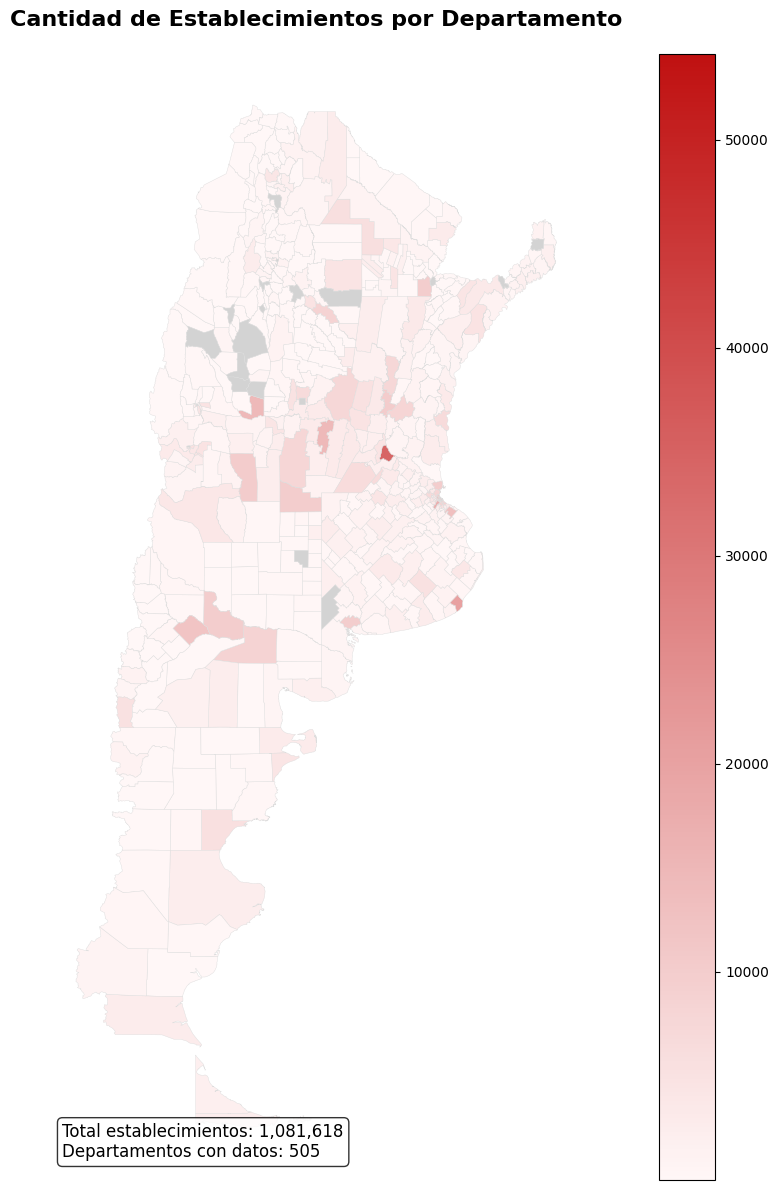

In [15]:
# Crear el cartograma
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Configurar el colormap
cmap = LinearSegmentedColormap.from_list('establecimientos', ["#fff7f7", "#c01111"])

# Plotear el mapa
gdf_merged.plot(column='establecimientos', 
                ax=ax, 
                cmap=cmap,
                legend=True,
                edgecolor="#DDDDDD",
                linewidth=0.3,
                missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

# Configuraciones del gráfico
ax.set_title('Cantidad de Establecimientos por Departamento', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

# Agregar información adicional
total_establecimientos = gdf_merged['establecimientos'].sum()
deptos_con_datos = gdf_merged['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos: {total_establecimientos:,.0f}\nDepartamentos con datos: {deptos_con_datos}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [16]:
# Filtrar por provincia Buenos Aires para obtener el AMBA y toda la provincia
gdf_buenos_aires = gdf_merged[gdf_merged['Nombre de provincia'] == 'Buenos Aires'].copy()

print(f"Departamentos/partidos de Buenos Aires encontrados: {len(gdf_buenos_aires)}")
print(f"Total establecimientos en Buenos Aires: {gdf_buenos_aires['establecimientos'].sum():,.0f}")

# Mostrar algunos departamentos
print("\nMuestra de departamentos de Buenos Aires:")
print(gdf_buenos_aires[['Nombre', 'establecimientos']].head(10))

Departamentos/partidos de Buenos Aires encontrados: 134
Total establecimientos en Buenos Aires: 336,891

Muestra de departamentos de Buenos Aires:
                   Nombre  establecimientos
0           Adolfo Alsina            1973.0
1  Adolfo Gonzales Chaves             372.0
2                 Alberti             301.0
3         Almirante Brown            5763.0
4              Avellaneda            8567.0
5                Ayacucho             861.0
6                    Azul            1970.0
7            Bahía Blanca           10033.0
8                Balcarce            1395.0
9                Baradero             907.0


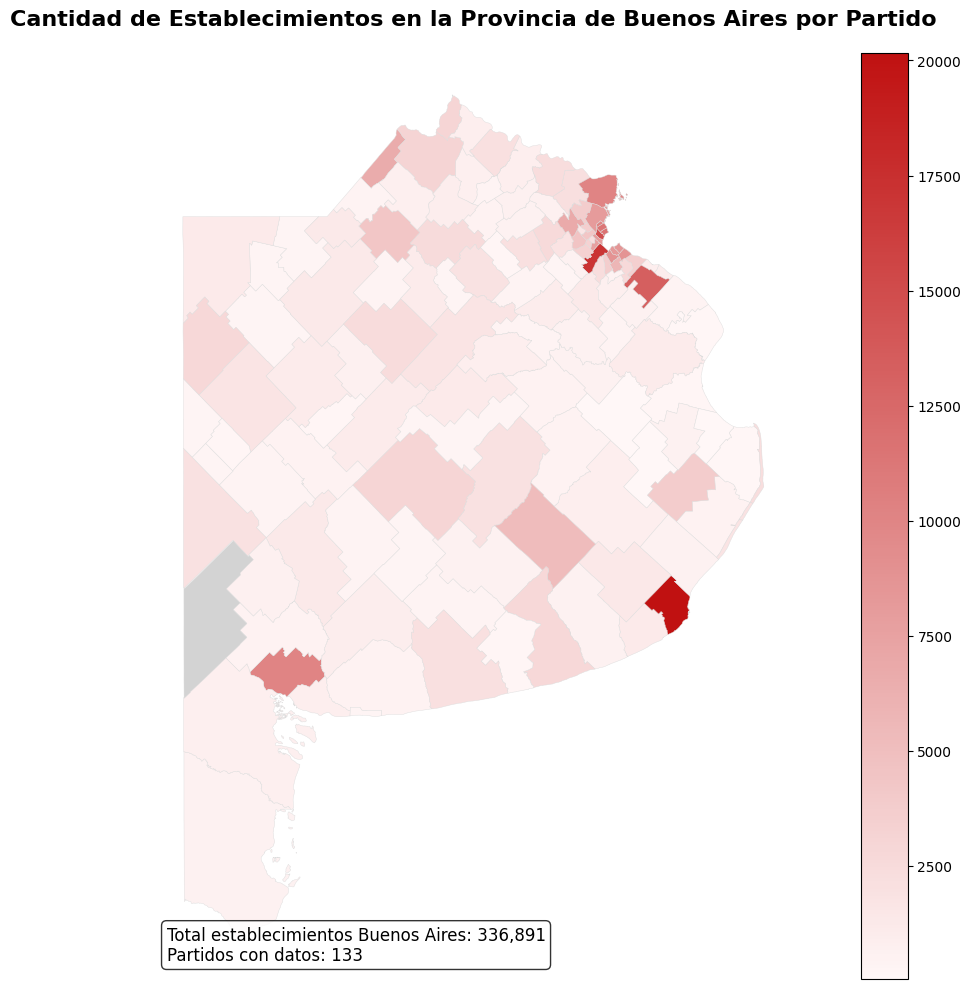

In [17]:
# Cartograma de toda la provincia de Buenos Aires
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Configurar el colormap (usando tu configuración)
cmap = LinearSegmentedColormap.from_list('establecimientos', ["#fff7f7", "#c01111"])

# Plotear el mapa de Buenos Aires
gdf_buenos_aires.plot(column='establecimientos', 
                      ax=ax, 
                      cmap=cmap,
                      legend=True,
                      edgecolor="#DDDDDD",
                      linewidth=0.3,
                      missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

# Configuraciones del gráfico
ax.set_title('Cantidad de Establecimientos en la Provincia de Buenos Aires por Partido', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

# Agregar información adicional
total_establecimientos_ba = gdf_buenos_aires['establecimientos'].sum()
deptos_con_datos_ba = gdf_buenos_aires['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos Buenos Aires: {total_establecimientos_ba:,.0f}\nPartidos con datos: {deptos_con_datos_ba}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# intento 2



In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import shape
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Cargar los datos de establecimientos con IDs
df_establecimientos = pd.read_csv('TablasModificadas/Datos_departamento/Datos_departamento_por_actividad_y_sexo_limpios.csv')

# Cargar el CSV con geometrías
df_geometrias = pd.read_csv('Departamentos (2010).csv')
df_geometrias.columns = ["Código","Nombre","Código_de_provincia","Nombre_de_provincia","Superficie_en_km2","Latitud_del_centroide","Longitud_del_centroide","Geometría_en_GeoJSON"]

# Convertir la columna GeoJSON a geometrías Shapely
df_geometrias['geometry'] = df_geometrias['Geometría_en_GeoJSON'].apply(
    lambda x: shape(json.loads(x)) if pd.notnull(x) and isinstance(x, str) else (
        shape(x) if pd.notnull(x) and isinstance(x, dict) else None
    )
)

# Convertir a GeoDataFrame
gdf_departamentos = gpd.GeoDataFrame(
    df_geometrias, 
    geometry='geometry',
    crs="EPSG:4326"
)

print("=== DATOS CARGADOS ===")
print(f"GeoDataFrame: {len(gdf_departamentos)} departamentos")
print(f"Datos establecimientos: {len(df_establecimientos)} registros")
print(f"Columnas establecimientos: {df_establecimientos.columns.tolist()}")

=== DATOS CARGADOS ===
GeoDataFrame: 525 departamentos
Datos establecimientos: 98924 registros
Columnas establecimientos: ['departamento', 'in_departamentos', 'clae6', 'empleados', 'establecimientos', 'empresas_exportadoras']


In [3]:
# Agrupar establecimientos por código de departamento
establecimientos_por_id = df_establecimientos.groupby('in_departamentos').agg({
    'establecimientos': 'sum',
    'empleados': 'sum',
    'empresas_exportadoras': 'sum'
}).reset_index()

print(f"\nEstablecimientos agrupados por ID: {len(establecimientos_por_id)} departamentos")
print(establecimientos_por_id.head())


Establecimientos agrupados por ID: 527 departamentos
   in_departamentos  establecimientos  empleados  empresas_exportadoras
0              2007           54124.0   543181.0                 5873.0
1              2014           15519.0    88651.0                 1137.0
2              2021           14413.0    96510.0                  856.0
3              2028           10343.0   152463.0                 1408.0
4              2035            9027.0    66707.0                  628.0


In [5]:
# Unir por código de departamento (mucho más robusto)
gdf_merged = gdf_departamentos.merge(establecimientos_por_id, 
                                    left_on='Código', 
                                    right_on='in_departamentos', 
                                    how='left')

print(f"\n=== UNIÓN POR CÓDIGO ===")
print(f"Departamentos unidos: {len(gdf_merged)}")
print(f"Departamentos con datos de establecimientos: {gdf_merged['establecimientos'].notna().sum()}")
print(f"Departamentos sin datos: {gdf_merged['establecimientos'].isna().sum()}")

# Verificar algunos ejemplos de la unión
print("\nEjemplos de unión:")
muestra_union = gdf_merged[['Código', 'Nombre', 'Nombre_de_provincia', 'establecimientos']].head(10)
print(muestra_union)


=== UNIÓN POR CÓDIGO ===
Departamentos unidos: 525
Departamentos con datos de establecimientos: 512
Departamentos sin datos: 13

Ejemplos de unión:
   Código                  Nombre Nombre_de_provincia  establecimientos
0    6007           Adolfo Alsina        Buenos Aires             550.0
1    6014  Adolfo Gonzales Chaves        Buenos Aires             372.0
2    6021                 Alberti        Buenos Aires             301.0
3    6028         Almirante Brown        Buenos Aires            5403.0
4    6035              Avellaneda        Buenos Aires            7741.0
5    6042                Ayacucho        Buenos Aires             696.0
6    6049                    Azul        Buenos Aires            1970.0
7    6056            Bahía Blanca        Buenos Aires           10033.0
8    6063                Balcarce        Buenos Aires            1395.0
9    6070                Baradero        Buenos Aires             907.0


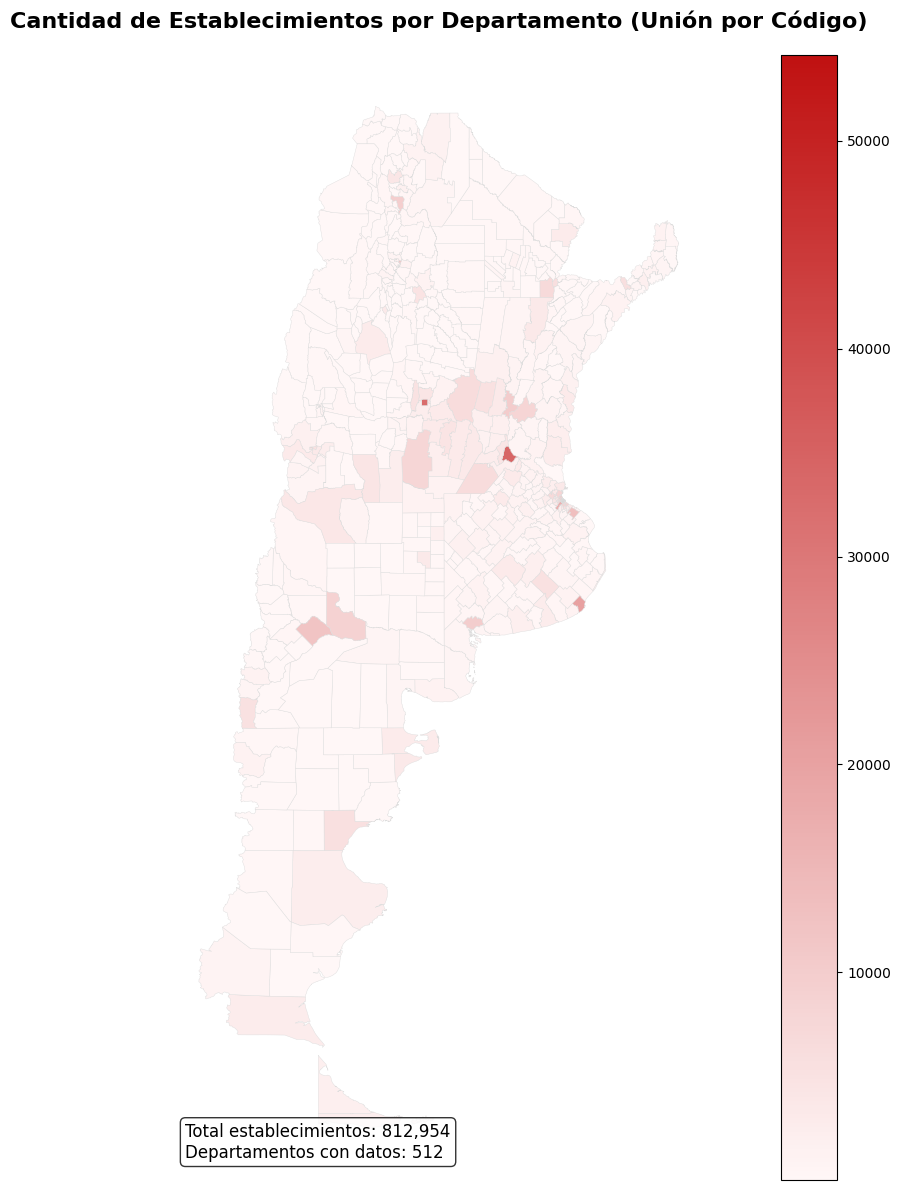

In [6]:
# Cartograma nacional usando la unión por código
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

cmap = LinearSegmentedColormap.from_list('establecimientos', ["#fff7f7", "#c01111"])

gdf_merged.plot(column='establecimientos', 
                ax=ax, 
                cmap=cmap,
                legend=True,
                edgecolor="#DDDDDD",
                linewidth=0.3,
                missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

ax.set_title('Cantidad de Establecimientos por Departamento (Unión por Código)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

total_establecimientos = gdf_merged['establecimientos'].sum()
deptos_con_datos = gdf_merged['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos: {total_establecimientos:,.0f}\nDepartamentos con datos: {deptos_con_datos}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [7]:
# Filtrar Buenos Aires por código de provincia
# Primero veamos qué códigos de provincia tenemos
print("Códigos de provincia únicos:")
print(gdf_merged['Código_de_provincia'].unique())

# Filtrar Buenos Aires (código 06 para Buenos Aires - verificar según tus datos)
gdf_buenos_aires = gdf_merged[gdf_merged['Código_de_provincia'] == 6].copy()  # Ajustar el código si es necesario

print(f"\nDepartamentos de Buenos Aires: {len(gdf_buenos_aires)}")
print(f"Establecimientos en Buenos Aires: {gdf_buenos_aires['establecimientos'].sum():,.0f}")

Códigos de provincia únicos:
[ 6 46 50 70 10 14 18 22 26 30 34 38 42 54 58 62 66 74 78 82 86 90 94  2]

Departamentos de Buenos Aires: 134
Establecimientos en Buenos Aires: 302,682


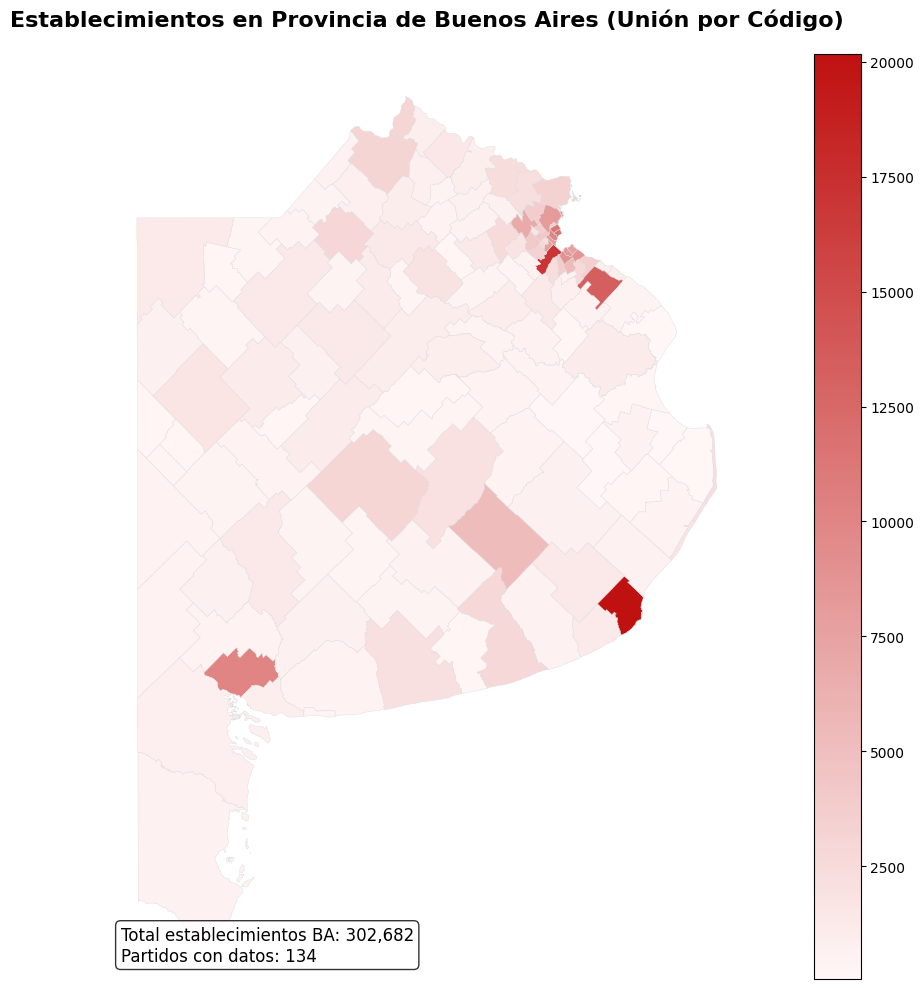

In [11]:
# Cartograma de Buenos Aires
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

gdf_buenos_aires.plot(column='establecimientos', 
                      ax=ax, 
                      cmap=cmap,
                      legend=True,
                      edgecolor="#DDDDDD",
                      linewidth=0.3,
                      missing_kwds={'color': 'lightgrey', 'label': 'Sin datos'})

ax.set_title('Establecimientos en Provincia de Buenos Aires (Unión por Código)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

total_ba = gdf_buenos_aires['establecimientos'].sum()
deptos_ba_con_datos = gdf_buenos_aires['establecimientos'].notna().sum()

ax.text(0.02, 0.02, 
        f'Total establecimientos BA: {total_ba:,.0f}\nPartidos con datos: {deptos_ba_con_datos}', 
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))


plt.tight_layout()
plt.show()

In [14]:
# Verificar la unión por código
print("=== DEBUGGING UNIÓN POR CÓDIGO ===")

# Códigos en establecimientos pero no en geometrías
codigos_estab = set(establecimientos_por_id['in_departamentos'].unique())
codigos_geo = set(gdf_departamentos['Código'].unique())

coinciden = codigos_estab.intersection(codigos_geo)
no_coinciden_estab = codigos_estab - codigos_geo
no_coinciden_geo = codigos_geo - codigos_estab

print(f"Códigos que coinciden: {len(coinciden)}")
print(f"Códigos en establecimientos pero no en geo: {len(no_coinciden_estab)}")
if no_coinciden_estab:
    print(f"  Ejemplos: {list(no_coinciden_estab)[:5]}")
print(f"Códigos en geo pero no en establecimientos: {len(no_coinciden_geo)}")
if no_coinciden_geo:
    print(f"  Ejemplos: {list(no_coinciden_geo)[:5]}")

# Muestra de códigos que sí coinciden
print(f"\nMuestra de códigos que coinciden:")
for codigo in list(coinciden)[:5]:
    nombre_geo = gdf_departamentos[gdf_departamentos['Código'] == codigo]['Nombre'].iloc[0]
    establecimientos = establecimientos_por_id[establecimientos_por_id['in_departamentos'] == codigo]['establecimientos'].iloc[0]
    print(f"  {codigo}: {nombre_geo} - {establecimientos:,.0f} establecimientos")

=== DEBUGGING UNIÓN POR CÓDIGO ===
Códigos que coinciden: 512
Códigos en establecimientos pero no en geo: 15
  Ejemplos: [np.int64(2049), np.int64(6466), np.int64(2084), np.int64(2021), np.int64(2056)]
Códigos en geo pero no en establecimientos: 13
  Ejemplos: [np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005)]

Muestra de códigos que coinciden:
  90112: Trancas - 162 establecimientos
  6147: Carlos Casares - 694 establecimientos
  86021: Atamisqui - 8 establecimientos
  90119: Yerba Buena - 1,852 establecimientos
  6154: Carlos Tejedor - 284 establecimientos


In [15]:
# Estadísticas finales
print(f"\n=== ESTADÍSTICAS FINALES (UNIÓN POR CÓDIGO) ===")
print(f"Total departamentos en GeoJSON: {len(gdf_departamentos)}")
print(f"Total departamentos en datos: {len(establecimientos_por_id)}")
print(f"Coincidencias exitosas: {len(coinciden)}")
print(f"Establecimientos totales mapeados: {gdf_merged['establecimientos'].sum():,.0f}")

# Eficiencia de la unión
eficiencia = (len(coinciden) / len(gdf_departamentos)) * 100
print(f"Eficiencia de unión: {eficiencia:.1f}%")


=== ESTADÍSTICAS FINALES (UNIÓN POR CÓDIGO) ===
Total departamentos en GeoJSON: 525
Total departamentos en datos: 527
Coincidencias exitosas: 512
Establecimientos totales mapeados: 812,954
Eficiencia de unión: 97.5%
